# 🧠 Machine Learning with the Iris Dataset

This tutorial walks through a basic ML pipeline using the Iris dataset.
We’ll cover data loading, visualization, model training, evaluation, and decision boundary visualization.


## 1. Getting and Preparing the Data

In [5]:
# Load required libraries
from sklearn import datasets
import pandas as pd

# Load the iris dataset
iris = datasets.load_iris() #Load the Iris dataset

# Create a DataFrame for easier manipulation
# create a dataframe called iris_df with the data and respective feature names
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
# add a 'target' column with the proper data from the iris dataset
iris_df['target'] = iris.target
#  Map target to class names for better readability
iris_df['target_name'] = iris_df['target'].map(lambda x: iris.target_names[x])

# Preview the dataset
#call the function to show the top rows in the data
iris_df.head(5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


## 2. Visualize the Data (plot)

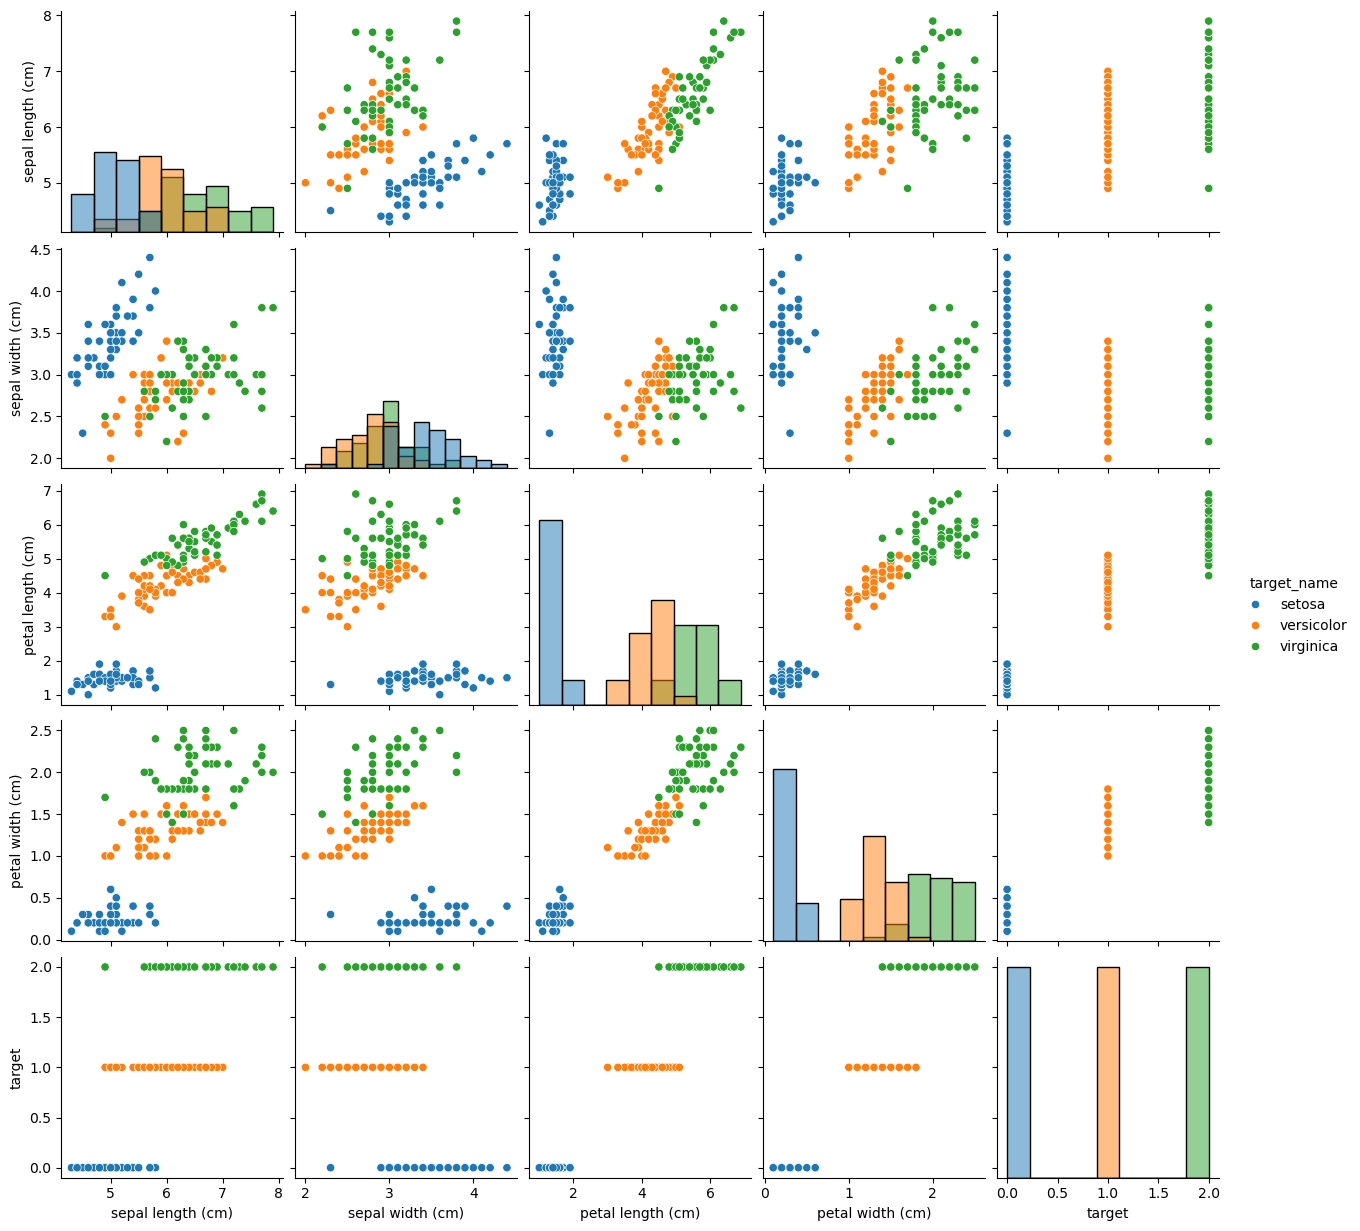


✅ Key Takeaway from the Pairplot:

- Iris Setosa is clearly separable from the other two species across multiple feature combinations.
- The features petal length and petal width provide the best separation between species —
  especially between Versicolor and Virginica, which are harder to distinguish.
- Sepal features (length and width) show significant overlap and are less useful for classification on their own.



In [7]:
# import the seaborn library with an alias of sns
import seaborn as sns
# import the matplot library with an alias of plt
import matplotlib.pyplot as plt
%matplotlib inline
# Pairplot to visualize feature relationships
# call the seaborn pair plot function with the iris dataset and set hue as 'target_name'
sns.pairplot(iris_df, hue="target_name", diag_kind="hist")
#show the plot
plt.show()
#Can you identify patterns, correlations, overlapping or outliers?
print("""
✅ Key Takeaway from the Pairplot:

- Iris Setosa is clearly separable from the other two species across multiple feature combinations.
- The features petal length and petal width provide the best separation between species —
  especially between Versicolor and Virginica, which are harder to distinguish.
- Sepal features (length and width) show significant overlap and are less useful for classification on their own.
""")

## 3. Split and Fit

In [9]:
#import the train test split library
from sklearn.model_selection import train_test_split
# import the Stochastic Gradient Classifier library
from sklearn.linear_model import SGDClassifier

# Select features and labels
# create an X variable with the iris feature data first with all the features, once you're done with the whole exercise come back here and just use the last 2 columns (petal length and petal width)
X = iris_df[iris.feature_names]
# create a y variable with the iris target labels
y = iris_df["target"]
# Split into training and testing sets
# call the train test split function with a test size of 30% and a random state for reproducibility. Values should be stored in X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)
# Fit a Linear Regression Classification using the perceptron algorithm
# create a SGDClassifer that uses the perceptron algorithm, and an alpha of 0.1, then experiment with high/low values to see how accuracy is affected
sgd_clf = SGDClassifier(loss="perceptron", alpha=0.1, max_iter=1000, tol=1e-3, random_state=42)

#Update Code Here: train the model
sgd_clf.fit(X_train, y_train)


SGDClassifier(alpha=0.1, loss='perceptron', random_state=42)

## 4. Validation and Assessment (Accuracy and Confusion Matrix)

Test Accuracy: 0.822


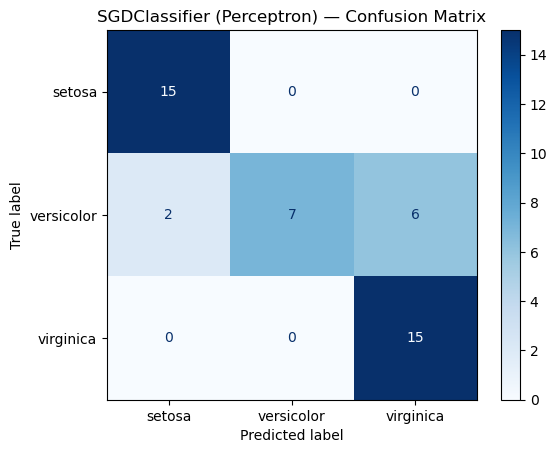

In [11]:
#import the 2 libraries needed for creating the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#import the library needed for computing accuracy
from sklearn.metrics import accuracy_score
# Predict using the model
# create a y_pred variable that calculated the predictions using the X_test testing data set
y_pred = sgd_clf.predict(X_test)
# Accuracy
# print the accuracy of your test data and predictions
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.3f}")

# Confusion matrix
# create confusion matrix called cm with our predicted vs true data
cm = confusion_matrix(y_test, y_pred)
#create a Confusion Matrix Display called disp using the previous cm and with the iris target names as display labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap="Blues", values_format="d")
plt.title("SGDClassifier (Perceptron) — Confusion Matrix")
plt.show()


## 5. Visualizing Decision Boundary

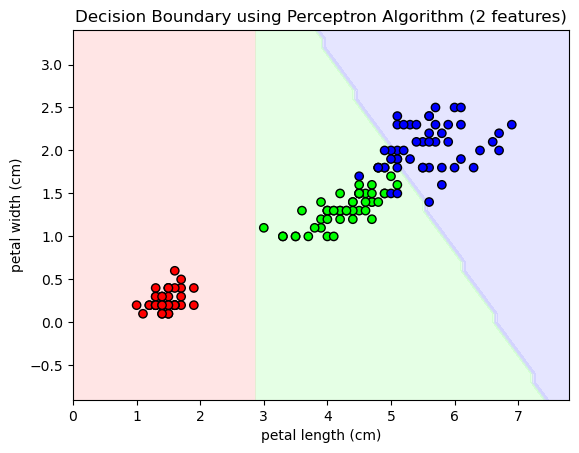

In [18]:
# For simplicity, use only two features for 2D decision boundary
from matplotlib.colors import ListedColormap
import numpy as np

# Select only the last two features
X_vis =  iris_df[["petal length (cm)", "petal width (cm)"]].values #Update Code Here: First use the last 2 features then experiment to see how decision boundary is affected.
y_vis = iris.target

# Split specifically for this 2-feature visualization
Xv_train, Xv_test, yv_train, yv_test = train_test_split(
    X_vis, y_vis, test_size=0.3, random_state=42, stratify=y_vis
)

# Train a new model on these 2 features
model_vis = SGDClassifier(loss="perceptron", alpha=0.1, max_iter=1000, tol=1e-3, random_state=42)
model_vis.fit(Xv_train, yv_train)

# No need to update anything below: Plot decision boundary
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = model_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']))
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, edgecolor='k', cmap=ListedColormap(['#FF0000', '#00FF00', '#0000FF']))
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.title('Decision Boundary using Perceptron Algorithm (2 features)')
plt.show()

# 🔄 Try changing which two features are selected in X_vis and alpha for experimentation